<a href="https://colab.research.google.com/github/javedmatrah/AIQ2/blob/main/Boston_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.6 Predicting house prices: a regression example
##3.6.1 The Boston Housing Price dataset

we have to predict price<br>
boston housing mid-1970<br>
506 data samples<br>
404 training and 102 testing samples<br>
13 Features (number of columns in X)


##Listing 3.24 Loading the Boston housing dataset

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
train_targets[0]

15.2

##3.6.2 Preparing the data
###Listing 3.25 Normalizing the data

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)

train_data /= std
test_data -= mean
test_data /= std

In [7]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [8]:
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [9]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [10]:
import numpy as np
np.array(train_data.mean(axis=0),dtype=np.int8)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [11]:
train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
np.mean(train_data, axis=0)

array([-1.01541438e-16,  1.09923072e-17,  1.80933376e-15, -7.80453809e-17,
       -5.25047552e-15,  6.43187374e-15,  2.98441140e-16,  4.94653823e-16,
        1.12671149e-17, -1.05526149e-16,  2.36614908e-14,  5.96710525e-15,
        6.13920356e-16])

#3.6.3 Building your network

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [15]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [16]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

##Listing 3.29 Building the history of successive mean K-fold validation scores

In [17]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [18]:
average_mae_history

[5.0393757820129395,
 3.469585657119751,
 3.31386399269104,
 3.07771897315979,
 2.9026682376861572,
 3.100541591644287,
 2.6650354862213135,
 2.7899580001831055,
 2.511460304260254,
 2.6659398078918457,
 2.5084526538848877,
 2.6045114994049072,
 2.5723989009857178,
 2.885308265686035,
 2.5688836574554443,
 2.564906120300293,
 2.612123966217041,
 2.541837453842163,
 2.518972635269165,
 2.532914161682129,
 2.8429691791534424,
 2.4004175662994385,
 2.8725974559783936,
 2.5700409412384033,
 2.354987859725952,
 2.4772324562072754,
 2.505274772644043,
 2.401184320449829,
 2.501206398010254,
 2.3917293548583984,
 2.5506508350372314,
 2.6331820487976074,
 2.4851491451263428,
 2.657567024230957,
 2.518705129623413,
 2.3588767051696777,
 2.436988115310669,
 2.436910390853882,
 2.634885311126709,
 2.7442944049835205,
 2.4040637016296387,
 2.365290880203247,
 2.3895719051361084,
 2.421823263168335,
 2.559755325317383,
 2.4762394428253174,
 2.489156484603882,
 2.5211994647979736,
 2.391539096832275

###Listing 3.30 Plotting validation scores

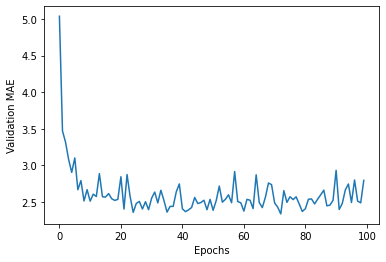

In [19]:
import matplotlib.pyplot as plt
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

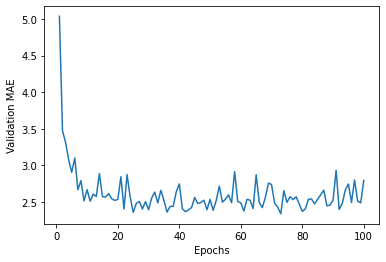

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

##Listing 3.31 Plotting validation scores, excluding the first 10 data points

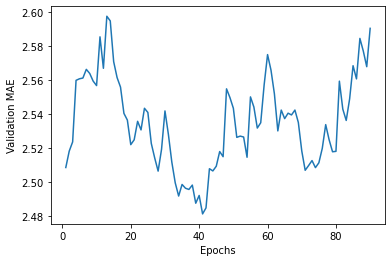

In [21]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

##Listing 3.32 Training the final model

In [22]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 17.1446 - mae: 2.6450


In [23]:
test_mse_score

17.14459991455078

In [24]:
test_mae_score

2.644951105117798

In [26]:
model.predict(test_data)

array([[ 8.239449 ],
       [19.106491 ],
       [21.659851 ],
       [33.521366 ],
       [24.729567 ],
       [21.847366 ],
       [26.352612 ],
       [21.586222 ],
       [19.342276 ],
       [21.812073 ],
       [20.543001 ],
       [17.023903 ],
       [16.554323 ],
       [40.852985 ],
       [19.518564 ],
       [20.048126 ],
       [25.3831   ],
       [18.32697  ],
       [18.579844 ],
       [25.663395 ],
       [11.178287 ],
       [14.298906 ],
       [21.306015 ],
       [15.188238 ],
       [19.981836 ],
       [24.62797  ],
       [28.35311  ],
       [27.64936  ],
       [10.970935 ],
       [19.760267 ],
       [19.704706 ],
       [14.986692 ],
       [32.811245 ],
       [23.275778 ],
       [17.07897  ],
       [ 7.8196716],
       [16.119081 ],
       [17.08983  ],
       [19.958052 ],
       [24.831747 ],
       [29.995386 ],
       [26.73409  ],
       [14.180643 ],
       [42.226402 ],
       [28.48726  ],
       [25.779867 ],
       [26.937859 ],
       [18.16